In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [6]:
df=pd.read_csv("D:\Data_sets\mobile_dataset.csv")

In [7]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [8]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


### 3 Feature selection techniques that are easy to use and also gives good results.

####    1. Univariate Selection

####   2. Feature Importance

####    3.Correlation Matrix with Heatmap

### 1. Univariate Selection


In [9]:
X=df.iloc[:,:-1]  # independent feature
y=df['price_range']

In [10]:
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


##### price_range: This is the target variable with a value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

In [11]:
y.unique()

array([1, 2, 3, 0], dtype=int64)

In [12]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [13]:
features=SelectKBest(score_func=chi2,k=20)
ordered_feature=features.fit(X,y)

In [14]:
ordered_feature.scores_

array([1.41298666e+04, 7.23232323e-01, 6.48365906e-01, 6.31010795e-01,
       1.01351665e+01, 1.52157239e+00, 8.98391244e+01, 7.45819631e-01,
       9.59728626e+01, 9.09755558e+00, 9.18605355e+00, 1.73635695e+04,
       9.81058675e+03, 9.31267519e+05, 9.61487832e+00, 1.64803191e+01,
       1.32364000e+01, 3.27642810e-01, 1.92842942e+00, 4.22090730e-01])

In [15]:
s1=pd.Series(ordered_feature.scores_)

In [16]:
s2=pd.Series(X.columns)

In [17]:
features_score=pd.concat([s2,s1], axis=1)

In [18]:
features_score.columns= ['Features', 'Score']

In [19]:
features_score

,Features,Score
0,battery_power,14129.866576
1,blue,0.723232
2,clock_speed,0.648366
3,dual_sim,0.631011
4,fc,10.135166
5,four_g,1.521572
6,int_memory,89.839124
7,m_dep,0.745820
8,mobile_wt,95.972863
9,n_cores,9.097556


In [20]:
features_score.sort_values(by='Score',ascending=False)

,Features,Score
13,ram,931267.519053
11,px_height,17363.569536
0,battery_power,14129.866576
12,px_width,9810.586750
8,mobile_wt,95.972863
6,int_memory,89.839124
15,sc_w,16.480319
16,talk_time,13.236400
4,fc,10.135166
14,sc_h,9.614878


In [17]:
features_score.nlargest(10,'Score')

,Features,Score
13,ram,931267.519053
11,px_height,17363.569536
0,battery_power,14129.866576
12,px_width,9810.586750
8,mobile_wt,95.972863
6,int_memory,89.839124
15,sc_w,16.480319
16,talk_time,13.236400
4,fc,10.135166
14,sc_h,9.614878


### 2. Feature Importance

#### Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

In [18]:
from sklearn.ensemble import ExtraTreesClassifier

In [19]:
model=ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [20]:
model.feature_importances_

array([0.06105636, 0.02008704, 0.03420369, 0.0190144 , 0.03243227,
       0.01728009, 0.03597495, 0.03485011, 0.03756321, 0.03385923,
       0.03384223, 0.04711266, 0.0499808 , 0.38593758, 0.03455534,
       0.03444028, 0.03570154, 0.01388146, 0.01780039, 0.02042636])

In [21]:
X

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


<BarContainer object of 20 artists>

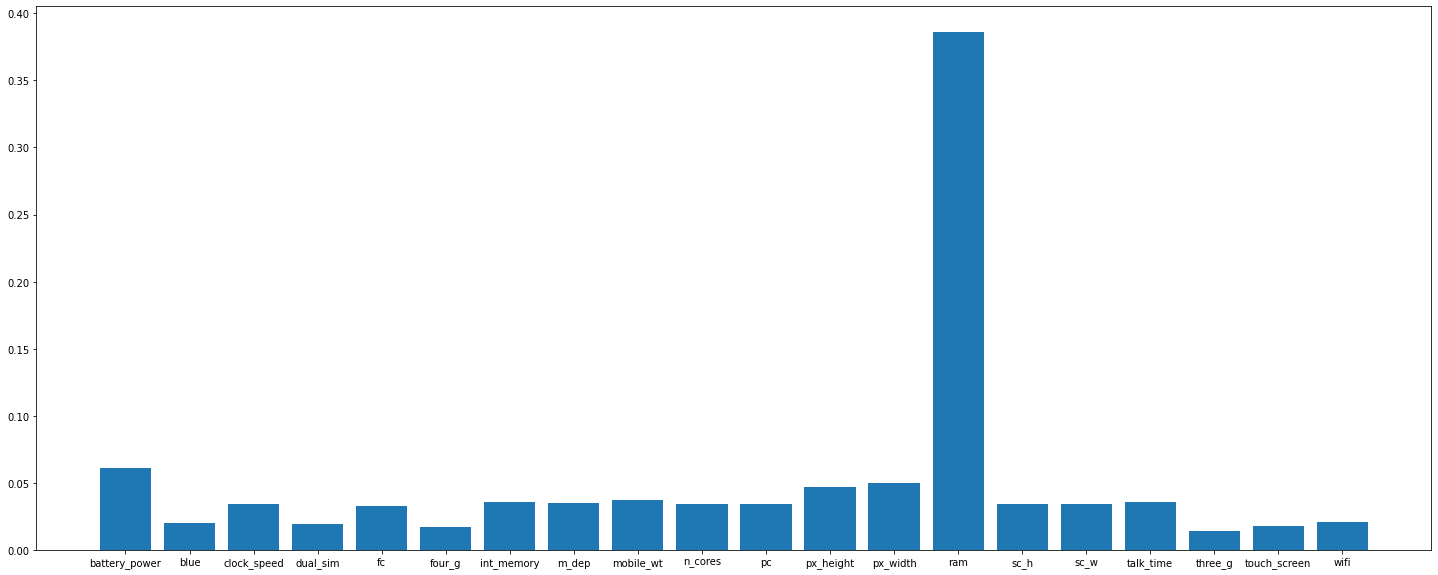

In [22]:
plt.figure(figsize=(25,10))
plt.bar(X.columns,model.feature_importances_)

In [23]:
feature_score2=pd.Series(model.feature_importances_, index=X.columns)

<AxesSubplot: >

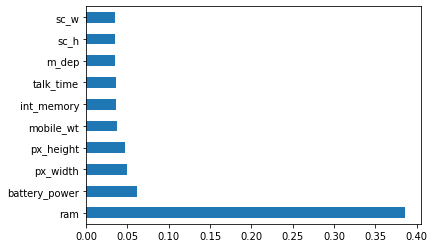

In [24]:
feature_score2.nlargest(10).plot(kind='barh')

### 3.Correlation Matrix with Heatmap

In [25]:
df_corr=df.corr()

In [26]:
df_corr

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


<AxesSubplot: >

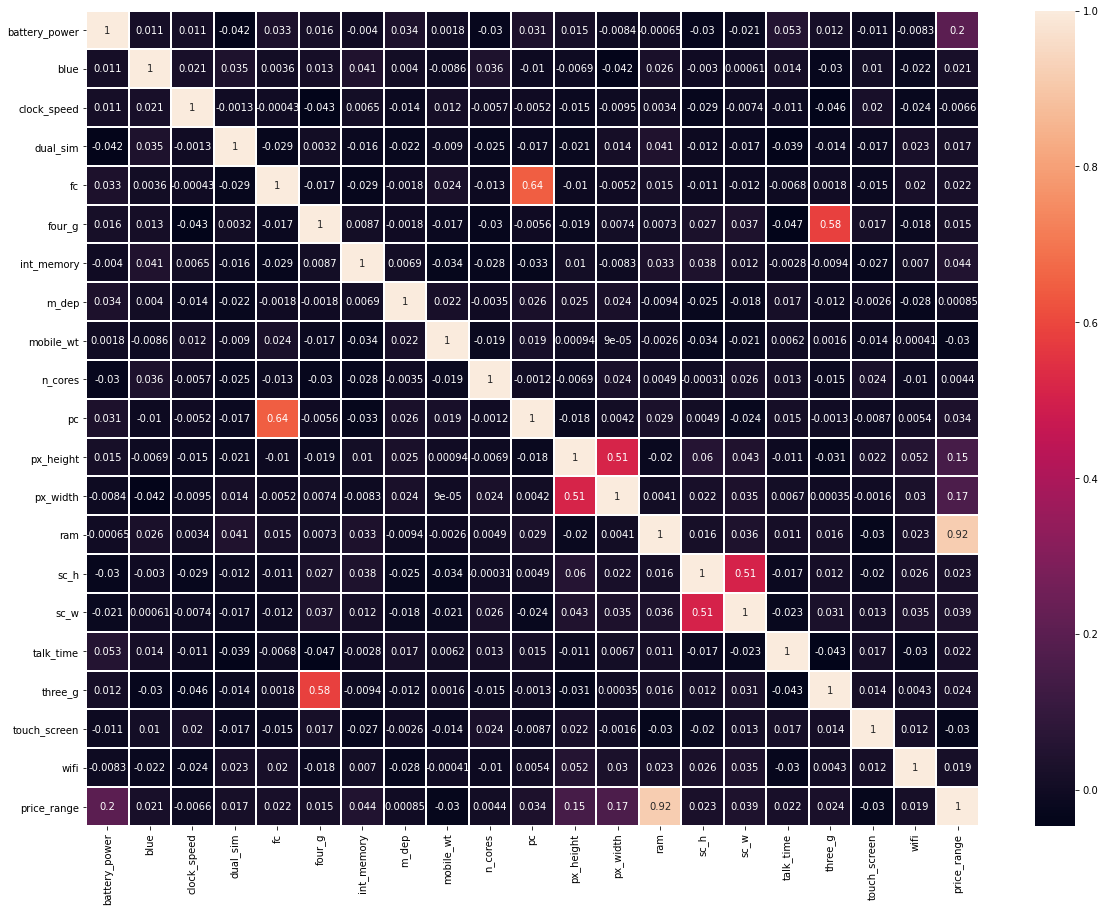

In [27]:
plt.figure(figsize=(20,15))
sns.heatmap(df_corr, annot=True, linewidths=2)

In [28]:
threshold=0.5

In [29]:
for i in range(len(df_corr)-1):
    for j in range(i):
        if abs(df_corr.iloc[i, j]) > threshold:
            print(df_corr.columns[i])

pc
px_width
sc_w
three_g


### Information Gain

In [30]:
from sklearn.feature_selection import mutual_info_classif

In [31]:
mutual_info=mutual_info_classif(X,y)

In [32]:
mutual_data=pd.Series(mutual_info,index=X.columns)
mutual_data.sort_values(ascending=False)

ram              0.843995
three_g          0.038504
battery_power    0.030317
px_height        0.029483
px_width         0.024637
wifi             0.021058
pc               0.019544
sc_w             0.014488
int_memory       0.014290
mobile_wt        0.012384
sc_h             0.006375
touch_screen     0.001149
talk_time        0.000303
m_dep            0.000000
n_cores          0.000000
blue             0.000000
four_g           0.000000
fc               0.000000
dual_sim         0.000000
clock_speed      0.000000
dtype: float64

In [ ]:
# 1 - approved, 0- not approved

In [33]:
df = pd.DataFrame({'class':[0,1,2,0,1,2,1,1,0,0,1,2,0,1,2,0,1,2,0,1,0,1,0],
                  "gender":[0,1,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,1,0,1,0,1,0],
                "approved":[0,1,1,0,0,1,1,0,0,0,1,1,0,0,1,0,1,1,0,0,0,0,0]})

In [34]:
df

,class,gender,approved
0,0,0,0
1,1,1,1
2,2,0,1
3,0,1,0
4,1,1,0
5,2,0,1
6,1,1,1
7,1,1,0
8,0,0,0
9,0,1,0


In [35]:
from sklearn.feature_selection import chi2

In [36]:
x= df.drop('approved', axis=1)

In [37]:
y = df.approved

In [40]:
chi2(x,y)[1]

array([0.00202777, 0.96058728])

In [48]:
chi_values = pd.Series(chi2(x,y)[0])

chi_values.index = x.columns

In [49]:
chi_values

class     9.524227
gender    0.002442
dtype: float64

In [45]:
p_values = pd.Series(chi2(x,y)[1])

p_values.index = x.columns

In [46]:
p_values

class     0.002028
gender    0.960587
dtype: float64

In [67]:
for i in range(10):
    print(i)
    for j in range(1,5):
        if j % 2==0:
            break
        print("  ",j)

0
   1
1
   1
2
   1
3
   1
4
   1
5
   1
6
   1
7
   1
8
   1
9
   1


In [62]:
for i in range(5):
    print(i)
    for j in range(1,5):
        if j % 2==0:
            continue
        print("  ",j)

0
   1
   3
1
   1
   3
2
   1
   3
3
   1
   3
4
   1
   3


In [66]:
for i in range(5):
    print(i)
    for j in range(1,5):
        if j % 2==0:
            continue
        print("  ",j)
        
    k =0    
    while k < 2:
        k+=1
        print("k", k)
        if k == 1:
            break
        

0
   1
   3
k 1
1
   1
   3
k 1
2
   1
   3
k 1
3
   1
   3
k 1
4
   1
   3
k 1


In [22]:
# Load libraries
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Load iris data
iris_dataset = load_iris()

# Create features and target
X = iris_dataset.data
y = iris_dataset.target

# Convert to categorical data by converting data to integers
X = X.astype(int)

# # Two features with highest chi-squared statistics are selected
# chi2_features = SelectKBest(chi2, k = 2)
# X_kbest_features = chi2_features.fit_transform(X, y)

# # Reduced features
# print('Original feature number:', X.shape[1])
# print('Reduced feature number:', X_kbest.shape[1])


In [23]:
X

array([[5, 3, 1, 0],
       [4, 3, 1, 0],
       [4, 3, 1, 0],
       [4, 3, 1, 0],
       [5, 3, 1, 0],
       [5, 3, 1, 0],
       [4, 3, 1, 0],
       [5, 3, 1, 0],
       [4, 2, 1, 0],
       [4, 3, 1, 0],
       [5, 3, 1, 0],
       [4, 3, 1, 0],
       [4, 3, 1, 0],
       [4, 3, 1, 0],
       [5, 4, 1, 0],
       [5, 4, 1, 0],
       [5, 3, 1, 0],
       [5, 3, 1, 0],
       [5, 3, 1, 0],
       [5, 3, 1, 0],
       [5, 3, 1, 0],
       [5, 3, 1, 0],
       [4, 3, 1, 0],
       [5, 3, 1, 0],
       [4, 3, 1, 0],
       [5, 3, 1, 0],
       [5, 3, 1, 0],
       [5, 3, 1, 0],
       [5, 3, 1, 0],
       [4, 3, 1, 0],
       [4, 3, 1, 0],
       [5, 3, 1, 0],
       [5, 4, 1, 0],
       [5, 4, 1, 0],
       [4, 3, 1, 0],
       [5, 3, 1, 0],
       [5, 3, 1, 0],
       [4, 3, 1, 0],
       [4, 3, 1, 0],
       [5, 3, 1, 0],
       [5, 3, 1, 0],
       [4, 2, 1, 0],
       [4, 3, 1, 0],
       [5, 3, 1, 0],
       [5, 3, 1, 0],
       [4, 3, 1, 0],
       [5, 3, 1, 0],
       [4, 3,

In [24]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## F_test

In [551]:
np.random.choice(['F','W','I'], 100)

array(['W', 'I', 'W', 'W', 'W', 'I', 'F', 'W', 'W', 'F', 'W', 'F', 'F',
       'I', 'W', 'W', 'F', 'W', 'F', 'W', 'W', 'W', 'I', 'I', 'F', 'W',
       'F', 'F', 'W', 'F', 'I', 'I', 'W', 'I', 'I', 'F', 'F', 'W', 'W',
       'F', 'W', 'F', 'I', 'W', 'W', 'F', 'F', 'I', 'W', 'I', 'W', 'W',
       'F', 'I', 'F', 'W', 'W', 'F', 'F', 'F', 'F', 'I', 'W', 'I', 'W',
       'W', 'I', 'I', 'W', 'I', 'I', 'W', 'I', 'W', 'W', 'I', 'F', 'I',
       'W', 'W', 'I', 'W', 'W', 'F', 'W', 'I', 'F', 'W', 'F', 'F', 'I',
       'F', 'F', 'W', 'F', 'W', 'W', 'W', 'F', 'I'], dtype='<U1')

In [552]:
df = pd.DataFrame({"Social_Media": np.random.choice(['F','W','I'], 100)})

In [553]:
df

,Social_Media
0,W
1,F
2,W
3,W
4,F
...,...
95,I
96,I
97,F
98,F


In [557]:
df['Hour1'] = np.random.randint(6,9, len(df))

In [558]:
d = {'F':[8,10], 'W':[6,8], 'I':[4,6]}

In [559]:
df['Hour2'] = df.Social_Media.apply(lambda x: np.random.randint(d[x][0],d[x][1]+1))

In [560]:
df

,Social_Media,Hour1,Hour2
0,W,6,8
1,F,8,10
2,W,7,6
3,W,8,6
4,F,6,10
...,...,...,...
95,I,8,4
96,I,6,4
97,F,8,10
98,F,6,10


In [561]:
df['hour4'] = [np.random.randint(d[x][0],d[x][1]+1) for x in df.Social_Media.values]

In [562]:
df

,Social_Media,Hour1,Hour2,hour4
0,W,6,8,6
1,F,8,10,10
2,W,7,6,6
3,W,8,6,7
4,F,6,10,10
...,...,...,...,...
95,I,8,4,4
96,I,6,4,6
97,F,8,10,9
98,F,6,10,9


In [563]:
# Performance when each of the engine
# oil is applied
performance1 = [89, 89, 88, 78, 79]
performance2 = [93, 92, 94, 89, 88]
performance3 = [89, 88, 89, 93, 90]
performance4 = [81, 78, 81, 92, 82]


In [564]:
# Importing library
from scipy.stats import f_oneway

# Performance when each of the engine
# oil is applied
performance1 = [89, 89, 88, 78, 79]
performance2 = [93, 92, 94, 89, 88]
performance3 = [89, 88, 89, 93, 90]
performance4 = [81, 78, 81, 92, 82]

# Conduct the one-way ANOVA
f_oneway(performance1, performance2, performance3, performance4)


F_onewayResult(statistic=4.625000000000002, pvalue=0.01633645983978022)

In [565]:
sample_df = df[['Social_Media','Hour1']]

In [566]:
sample_df

,Social_Media,Hour1
0,W,6
1,F,8
2,W,7
3,W,8
4,F,6
...,...,...
95,I,8
96,I,6
97,F,8
98,F,6


In [567]:
# Create ANOVA backbone table
data = [['Between Groups', '', '', '', '', '', ''], ['Within Groups', '', '', '', '', '', ''], ['Total', '', '', '', '', '', '']] 
anova_table = pd.DataFrame(data, columns = ['Source of Variation', 'SS', 'df', 'MS', 'F', 'P-value', 'F crit']) 
anova_table.set_index('Source of Variation', inplace = True)

In [568]:
anova_table

,SS,df,MS,F,P-value,F crit
Source of Variation,,,,,,
Between Groups,,,,,,
Within Groups,,,,,,
Total,,,,,,


In [569]:
# calculate SSTR and update anova table
x_bar = sample_df['Hour1'].mean()
SSTR = sample_df.groupby('Social_Media').count() * (sample_df.groupby('Social_Media').mean() - x_bar)**2
anova_table['SS']['Between Groups'] = SSTR['Hour1'].sum()

In [570]:
anova_table

,SS,df,MS,F,P-value,F crit
Source of Variation,,,,,,
Between Groups,4.906405,,,,,
Within Groups,,,,,,
Total,,,,,,


In [571]:
# calculate SSE and update anova table
SSE = (sample_df.groupby('Social_Media').count() - 1) * sample_df.groupby('Social_Media').std()**2
anova_table['SS']['Within Groups'] = SSE['Hour1'].sum()

In [572]:
anova_table

,SS,df,MS,F,P-value,F crit
Source of Variation,,,,,,
Between Groups,4.906405,,,,,
Within Groups,62.453595,,,,,
Total,,,,,,


In [573]:
# calculate SSTR and update anova table
SSTR = SSTR['Hour1'].sum() + SSE['Hour1'].sum()
anova_table['SS']['Total'] = SSTR

In [574]:
anova_table

,SS,df,MS,F,P-value,F crit
Source of Variation,,,,,,
Between Groups,4.906405,,,,,
Within Groups,62.453595,,,,,
Total,67.36,,,,,


In [575]:
# update degree of freedom
anova_table['df']['Between Groups'] = sample_df['Social_Media'].nunique() - 1
anova_table['df']['Within Groups'] = sample_df.shape[0] - sample_df['Social_Media'].nunique()
anova_table['df']['Total'] = sample_df.shape[0] - 1

In [576]:
anova_table

,SS,df,MS,F,P-value,F crit
Source of Variation,,,,,,
Between Groups,4.906405,2,,,,
Within Groups,62.453595,97,,,,
Total,67.36,99,,,,


In [577]:
# calculate MS
anova_table['MS'] = anova_table['SS'] / anova_table['df']

In [578]:
anova_table

,SS,df,MS,F,P-value,F crit
Source of Variation,,,,,,
Between Groups,4.906405,2,2.453203,,,
Within Groups,62.453595,97,0.643851,,,
Total,67.36,99,0.680404,,,


In [579]:
 # calculate F 
F = anova_table['MS']['Between Groups'] / anova_table['MS']['Within Groups']
anova_table['F']['Between Groups'] = F

In [580]:
anova_table

,SS,df,MS,F,P-value,F crit
Source of Variation,,,,,,
Between Groups,4.906405,2,2.453203,3.810199,,
Within Groups,62.453595,97,0.643851,,,
Total,67.36,99,0.680404,,,


In [581]:
import scipy.stats as stats

In [582]:
 # p-value
anova_table['P-value']['Between Groups'] = 1 - stats.f.cdf(F, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])


In [583]:
anova_table

,SS,df,MS,F,P-value,F crit
Source of Variation,,,,,,
Between Groups,4.906405,2,2.453203,3.810199,0.025529,
Within Groups,62.453595,97,0.643851,,,
Total,67.36,99,0.680404,,,


In [584]:
# F critical 
alpha = 0.05
# possible types "right-tailed, left-tailed, two-tailed"
tail_hypothesis_type = "two-tailed"
if tail_hypothesis_type == "two-tailed":
    alpha /= 2
anova_table['F crit']['Between Groups'] = stats.f.ppf(1-alpha, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

In [585]:
anova_table

,SS,df,MS,F,P-value,F crit
Source of Variation,,,,,,
Between Groups,4.906405,2,2.453203,3.810199,0.025529,3.832792
Within Groups,62.453595,97,0.643851,,,
Total,67.36,99,0.680404,,,


In [586]:
def anova_test(sample_df, indenpendent_var, dependent_var):
    
    # Create ANOVA backbone table
    data = [['Between Groups', '', '', '', '', '', ''], ['Within Groups', '', '', '', '', '', ''], ['Total', '', '', '', '', '', '']] 
    anova_table = pd.DataFrame(data, columns = ['Source of Variation', 'SS', 'df', 'MS', 'F', 'P-value', 'F crit']) 
    anova_table.set_index('Source of Variation', inplace = True)

    # calculate SSTR and update anova table
    x_bar = sample_df[dependent_var].mean()
    SSTR = sample_df.groupby(indenpendent_var).count() * (sample_df.groupby(indenpendent_var).mean() - x_bar)**2
    anova_table['SS']['Between Groups'] = SSTR[dependent_var].sum()

    # calculate SSE and update anova table
    SSE = (sample_df.groupby(indenpendent_var).count() - 1) * sample_df.groupby(indenpendent_var).std()**2
    anova_table['SS']['Within Groups'] = SSE[dependent_var].sum()

    # calculate SSTR and update anova table
    SSTR = SSTR[dependent_var].sum() + SSE[dependent_var].sum()
    anova_table['SS']['Total'] = SSTR

    # update degree of freedom
    anova_table['df']['Between Groups'] = sample_df[indenpendent_var].nunique() - 1
    anova_table['df']['Within Groups'] = sample_df.shape[0] - sample_df[indenpendent_var].nunique()
    anova_table['df']['Total'] = sample_df.shape[0] - 1

    # calculate MS
    anova_table['MS'] = anova_table['SS'] / anova_table['df']

    # calculate F 
    F = anova_table['MS']['Between Groups'] / anova_table['MS']['Within Groups']
    anova_table['F']['Between Groups'] = F

    # p-value
    anova_table['P-value']['Between Groups'] = 1 - stats.f.cdf(F, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

    # F critical 
    alpha = 0.05
    # possible types "right-tailed, left-tailed, two-tailed"
    tail_hypothesis_type = "two-tailed"
    if tail_hypothesis_type == "two-tailed":
        alpha /= 2
    anova_table['F crit']['Between Groups'] = stats.f.ppf(1-alpha, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

    print(anova_table)
    
    # The p-value approach
    print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
    conclusion = "Failed to reject the null hypothesis."
    if anova_table['P-value']['Between Groups'] <= alpha:
        conclusion = "Null Hypothesis is rejected."
    print("Alpha:", alpha, " and p value is:", anova_table['P-value']['Between Groups'])    
    print(conclusion)

    # The critical value approach
    print("\n--------------------------------------------------------------------------------------")
    print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
    conclusion = "Failed to reject the null hypothesis."
    if anova_table['F']['Between Groups'] > anova_table['F crit']['Between Groups']:
        conclusion = "Null Hypothesis is rejected."
    print("F-score is:", anova_table['F']['Between Groups'], " and critical value is:", anova_table['F crit']['Between Groups'])
    print(conclusion)
    
    # Final ANOVA Table
#     return anova_table


In [587]:
df

,Social_Media,Hour1,Hour2,hour4
0,W,6,8,6
1,F,8,10,10
2,W,7,6,6
3,W,8,6,7
4,F,6,10,10
...,...,...,...,...
95,I,8,4,4
96,I,6,4,6
97,F,8,10,9
98,F,6,10,9


In [588]:
# anova_test(sample_df, indenpendent_var, dependent_var)
anova_test(df, 'Social_Media', 'Hour1')

                            SS  df        MS         F   P-value    F crit
Source of Variation                                                       
Between Groups        4.906405   2  2.453203  3.810199  0.025529  3.832792
Within Groups        62.453595  97  0.643851                              
Total                    67.36  99  0.680404                              
Approach 1: The p-value approach to hypothesis testing in the decision rule
Alpha: 0.025  and p value is: 0.02552907519773573
Failed to reject the null hypothesis.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 3.8101994683634355  and critical value is: 3.832791762079373
Failed to reject the null hypothesis.


In [589]:
# anova_test(sample_df, indenpendent_var, dependent_var)
anova_test(df, 'Social_Media', 'Hour2')

                            SS  df          MS           F P-value    F crit
Source of Variation                                                         
Between Groups       288.34719   2  144.173595  203.733481     0.0  3.832792
Within Groups         68.64281  97    0.707658                              
Total                   356.99  99     3.60596                              
Approach 1: The p-value approach to hypothesis testing in the decision rule
Alpha: 0.025  and p value is: 1.1102230246251565e-16
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 203.7334806019605  and critical value is: 3.832791762079373
Null Hypothesis is rejected.


In [590]:
df.groupby('Social_Media').mean()

,Hour1,Hour2,hour4
Social_Media,,,
F,7.055556,9.027778,9.027778
I,7.352941,4.970588,5.117647
W,6.800000,6.900000,6.866667


In [591]:
df.groupby('Social_Media').var()

,Hour1,Hour2,hour4
Social_Media,,,
F,0.682540,0.770635,0.599206
I,0.598930,0.696078,0.652406
W,0.648276,0.644828,0.740230


## Chi- Square 

In [592]:
# N - Never
# O - Occassional 
# F - Frequent 

In [593]:
# TP - Trouble with Police
# NTP - Not Trouble with Police

In [594]:
no_of_group = ['TP','NTP']

category = ['N','O','F']

values_dict = {'TP':[71,154,398],
              'NTP':[4992,2808,2737]}

In [517]:
data = []
for gp in no_of_group:
    g1 = [gp] + [val for val in values_dict[gp]] 
    data.append(g1)
    

In [518]:
data

[['TP', 71, 154, 398], ['NTP', 4992, 2808, 2737]]

In [422]:
columns = ['Group'] + [cat for cat in category] 

In [423]:
data = pd.DataFrame(data, columns = columns)
data.set_index('Group', inplace = True)

In [424]:
data

,N,O,F
Group,,,
TP,71,154,398
NTP,4992,2808,2737


In [427]:
chi_data = []
for gp in no_of_group:
    for cat in category:
        name = f'{gp} ({cat})'
        g1 = [name] + [""]*8
        chi_data.append(g1)
        
chi_table = pd.DataFrame(chi_data, columns = ['Group', 'O', 'E', '(O-E)', 'Square(O-E)', 'Square(O-E) / E', 'Chi-Sq','P-value', 'Chi-sq crit']) 
chi_table.set_index('Group', inplace = True)

In [428]:
chi_table

,O,E,(O-E),Square(O-E),Square(O-E) / E,Chi-Sq,P-value,Chi-sq crit
Group,,,,,,,,
TP (N),,,,,,,,
TP (O),,,,,,,,
TP (F),,,,,,,,
NTP (N),,,,,,,,
NTP (O),,,,,,,,
NTP (F),,,,,,,,


In [429]:
data

,N,O,F
Group,,,
TP,71,154,398
NTP,4992,2808,2737


In [430]:
sum(data['N'].values)

5063

In [431]:
sum([sum(data[cat].values) for cat in category])

11160

In [432]:
data.iloc[1]

N    4992
O    2808
F    2737
Name: NTP, dtype: int64

In [433]:
np.sum(data[data.index.get_level_values('Group').str.fullmatch("TP")].values)

623

In [434]:
for cat in category:
    for gp in no_of_group:
        chi_table['O'][f'{gp} ({cat})'] = data[cat][gp]

In [435]:
chi_table

,O,E,(O-E),Square(O-E),Square(O-E) / E,Chi-Sq,P-value,Chi-sq crit
Group,,,,,,,,
TP (N),71,,,,,,,
TP (O),154,,,,,,,
TP (F),398,,,,,,,
NTP (N),4992,,,,,,,
NTP (O),2808,,,,,,,
NTP (F),2737,,,,,,,


In [436]:
total = sum([sum(data[cat].values) for cat in category])

In [437]:
for cat in category:
    for gp in no_of_group:
        row_total = np.sum(data[data.index.get_level_values('Group').str.fullmatch(gp)].values)
        col_total = sum(data[cat].values)
#         print(row_total, col_total)
        chi_table['E'][f'{gp} ({cat})'] =  (row_total * col_total) / total 

In [438]:
chi_table

,O,E,(O-E),Square(O-E),Square(O-E) / E,Chi-Sq,P-value,Chi-sq crit
Group,,,,,,,,
TP (N),71,282.638799,,,,,,
TP (O),154,165.351792,,,,,,
TP (F),398,175.009409,,,,,,
NTP (N),4992,4780.361201,,,,,,
NTP (O),2808,2796.648208,,,,,,
NTP (F),2737,2959.990591,,,,,,


In [439]:
chi_table['(O-E)'] = chi_table['O'] - chi_table['E']

In [440]:
chi_table['Square(O-E)'] = chi_table['(O-E)'] ** 2

In [441]:
chi_table['Square(O-E) / E'] = chi_table['Square(O-E)'] / chi_table['E']

In [442]:
chi_table

,O,E,(O-E),Square(O-E),Square(O-E) / E,Chi-Sq,P-value,Chi-sq crit
Group,,,,,,,,
TP (N),71,282.638799,-211.638799,44790.981362,158.474284,,,
TP (O),154,165.351792,-11.351792,128.863184,0.779327,,,
TP (F),398,175.009409,222.990591,49724.803852,284.126461,,,
NTP (N),4992,4780.361201,211.638799,44790.981362,9.36979,,,
NTP (O),2808,2796.648208,11.351792,128.863184,0.046078,,,
NTP (F),2737,2959.990591,-222.990591,49724.803852,16.798974,,,


In [449]:
chi_table

,O,E,(O-E),Square(O-E),Square(O-E) / E,Chi-Sq,P-value,Chi-sq crit
Group,,,,,,,,
TP (N),71,282.638799,-211.638799,44790.981362,158.474284,,,
TP (O),154,165.351792,-11.351792,128.863184,0.779327,,,
TP (F),398,175.009409,222.990591,49724.803852,284.126461,,,
NTP (N),4992,4780.361201,211.638799,44790.981362,9.36979,,,
NTP (O),2808,2796.648208,11.351792,128.863184,0.046078,,,
NTP (F),2737,2959.990591,-222.990591,49724.803852,16.798974,,,


In [451]:
chi_table

,O,E,(O-E),Square(O-E),Square(O-E) / E,Chi-Sq,P-value,Chi-sq crit
Group,,,,,,,,
TP (N),71,282.638799,-211.638799,44790.981362,158.474284,,,
TP (O),154,165.351792,-11.351792,128.863184,0.779327,,,
TP (F),398,175.009409,222.990591,49724.803852,284.126461,,,
NTP (N),4992,4780.361201,211.638799,44790.981362,9.36979,,,
NTP (O),2808,2796.648208,11.351792,128.863184,0.046078,,,
NTP (F),2737,2959.990591,-222.990591,49724.803852,16.798974,,,


In [463]:
data.shape

(2, 3)

In [468]:
degree_of_freedom = (data.shape[0]-1) * (data.shape[1]-1)

In [469]:
chi_sq_value = sum(chi_table['Square(O-E) / E'].values)
chi_table['Chi-Sq'][chi_table.index[0]] = chi_sq_value

In [470]:
p_value = 1 - stats.chi2.cdf(chi_sq_value, degree_of_freedom)
chi_table['P-value'][chi_table.index[0]] = p_value

In [471]:
1- stats.chi2.cdf(5,2)

0.08208499862389884

In [472]:
chi_table['Chi-sq crit'][chi_table.index[0]] = stats.chi2.ppf(1- alpha, degree_of_freedom )

In [473]:
chi_table

,O,E,(O-E),Square(O-E),Square(O-E) / E,Chi-Sq,P-value,Chi-sq crit
Group,,,,,,,,
TP (N),71,282.638799,-211.638799,44790.981362,158.474284,469.594914,0.0,7.377759
TP (O),154,165.351792,-11.351792,128.863184,0.779327,,,
TP (F),398,175.009409,222.990591,49724.803852,284.126461,,,
NTP (N),4992,4780.361201,211.638799,44790.981362,9.36979,,,
NTP (O),2808,2796.648208,11.351792,128.863184,0.046078,,,
NTP (F),2737,2959.990591,-222.990591,49724.803852,16.798974,,,


In [483]:
print(chi_table)

print("\n--------------------------------------------------------------------------------------")
# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
conclusion = "Failed to reject the null hypothesis."
if chi_table['P-value'][chi_table.index[0]] <= alpha:
    conclusion = "Null Hypothesis is rejected."
print("Chi-sq-score is:", chi_table['Chi-Sq'][chi_table.index[0]], " and p value is:", chi_table['P-value'][chi_table.index[0]])    
print(conclusion)

# The critical value approach
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
conclusion = "Failed to reject the null hypothesis."
if chi_table['Chi-Sq'][chi_table.index[0]] > chi_table['Chi-sq crit'][chi_table.index[0]]:
    conclusion = "Null Hypothesis is rejected."
print("Chi-sq-score is:", chi_table['Chi-Sq'][chi_table.index[0]], " and critical value is:", chi_table['Chi-sq crit'][chi_table.index[0]])
print(conclusion)

            O            E       (O-E)   Square(O-E) Square(O-E) / E  \
Group                                                                  
TP (N)     71   282.638799 -211.638799  44790.981362      158.474284   
TP (O)    154   165.351792  -11.351792    128.863184        0.779327   
TP (F)    398   175.009409  222.990591  49724.803852      284.126461   
NTP (N)  4992  4780.361201  211.638799  44790.981362         9.36979   
NTP (O)  2808  2796.648208   11.351792    128.863184        0.046078   
NTP (F)  2737  2959.990591 -222.990591  49724.803852       16.798974   

             Chi-Sq P-value Chi-sq crit  
Group                                    
TP (N)   469.594914     0.0    7.377759  
TP (O)                                   
TP (F)                                   
NTP (N)                                  
NTP (O)                                  
NTP (F)                                  

--------------------------------------------------------------------------------------

In [520]:
def chi_square(no_of_group, category, values_dict, alpha):

    data = []
    for gp in no_of_group:
        g1 = [gp] + [val for val in values_dict[gp]] 
        data.append(g1)

    columns = ['Group'] + [cat for cat in category]
    data = pd.DataFrame(data, columns = columns)
    data.set_index('Group', inplace = True)

    chi_data = []
    for gp in no_of_group:
        for cat in category:
            name = f'{gp} ({cat})'
            g1 = [name] + [""]*8
            chi_data.append(g1)
            
    chi_table = pd.DataFrame(chi_data, columns = ['Group', 'O', 'E', '(O-E)', 'Square(O-E)', 'Square(O-E) / E', 'Chi-Sq','P-value', 'Chi-sq crit']) 
    chi_table.set_index('Group', inplace = True)

    for cat in category:
        for gp in no_of_group:
            chi_table['O'][f'{gp} ({cat})'] = data[cat][gp]

    total = sum([sum(data[cat].values) for cat in category])

    for cat in category:
        for gp in no_of_group:
            row_total = np.sum(data[data.index.get_level_values('Group').str.fullmatch(gp)].values)
            col_total = sum(data[cat].values)
    #         print(row_total, col_total)
            chi_table['E'][f'{gp} ({cat})'] =  int((row_total * col_total) / total)

    chi_table['(O-E)'] = chi_table['O'] - chi_table['E']
    chi_table['Square(O-E)'] = chi_table['(O-E)'] ** 2
    chi_table['Square(O-E) / E'] = chi_table['Square(O-E)'] / chi_table['E']

    degree_of_freedom = (data.shape[0]-1) * (data.shape[1]-1)

    chi_sq_value = sum(chi_table['Square(O-E) / E'].values)
    chi_table['Chi-Sq'][chi_table.index[0]] = chi_sq_value

    p_value = 1- stats.chi2.cdf(chi_sq_value, degree_of_freedom)
    chi_table['P-value'][chi_table.index[0]] = p_value

    chi_table['Chi-sq crit'][chi_table.index[0]] = stats.chi2.ppf(1- alpha, degree_of_freedom)

#     print(chi_table)

    print("\n--------------------------------------------------------------------------------------")
    # The p-value approach
    print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
    conclusion = "Failed to reject the null hypothesis."
    if chi_table['P-value'][chi_table.index[0]] <= alpha:
        conclusion = "Null Hypothesis is rejected."
    print("Alpha :", alpha, " and p value is:", chi_table['P-value'][chi_table.index[0]])    
    print(conclusion)

    # The critical value approach
    print("\n--------------------------------------------------------------------------------------")
    print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
    conclusion = "Failed to reject the null hypothesis."
    if chi_table['Chi-Sq'][chi_table.index[0]] > chi_table['Chi-sq crit'][chi_table.index[0]]:
        conclusion = "Null Hypothesis is rejected."
    print("Chi-sq-score is:", chi_table['Chi-Sq'][chi_table.index[0]], " and critical value is:", chi_table['Chi-sq crit'][chi_table.index[0]])
    print(conclusion)
    
    return chi_table


In [521]:
## 1st example

In [522]:
no_of_group = ['TP','NTP']

category = ['Never','Occassional', 'Frequent' ]

values_dict = {'TP':[71,154,398],
              'NTP':[4992,2808,2737]}

In [523]:
chi_square(no_of_group,category, values_dict, 0.10)


--------------------------------------------------------------------------------------
Approach 1: The p-value approach to hypothesis testing in the decision rule
Alpha : 0.1  and p value is: 0.0
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
Chi-sq-score is: 468.88457365102414  and critical value is: 4.605170185988092
Null Hypothesis is rejected.


,O,E,(O-E),Square(O-E),Square(O-E) / E,Chi-Sq,P-value,Chi-sq crit
Group,,,,,,,,
TP (Never),71,282,-211,44521,157.875887,468.884574,0.0,4.60517
TP (Occassional),154,165,-11,121,0.733333,,,
TP (Frequent),398,175,223,49729,284.165714,,,
NTP (Never),4992,4780,212,44944,9.40251,,,
NTP (Occassional),2808,2796,12,144,0.051502,,,
NTP (Frequent),2737,2959,-222,49284,16.655627,,,


In [508]:
## 2nd example

In [514]:
no_of_group = ['Male','Female']

category = ['Yes','No']

values_dict = {'Male':[38,178],
              'Female':[44,140]}

In [515]:
chi_square(no_of_group,category, values_dict, 0.05)


--------------------------------------------------------------------------------------
Approach 1: The p-value approach to hypothesis testing in the decision rule
Chi-sq-score is: 2.6756311925742353  and p value is: 0.10189492004247602
Failed to reject the null hypothesis.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
Chi-sq-score is: 2.6756311925742353  and critical value is: 3.841458820694124
Failed to reject the null hypothesis.


,O,E,(O-E),Square(O-E),Square(O-E) / E,Chi-Sq,P-value,Chi-sq crit
Group,,,,,,,,
Male (Yes),38,44,-6,36,0.818182,2.675631,0.101895,3.841459
Male (No),178,171,7,49,0.28655,,,
Female (Yes),44,37,7,49,1.324324,,,
Female (No),140,146,-6,36,0.246575,,,


In [405]:
stats.f.ppf(1-0.10, 1, 1)

39.86345818906144

In [406]:
stats.chi2.ppf(1-0.10,2)

4.605170185988092

In [408]:
stats.chi2.cdf(0.10,2)

0.04877057549928599

In [486]:
1- stats.chi2.cdf(7.1,3)

0.06877781936579974